# Import libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow
from tensorflow import keras
from keras import models
from keras import layers
from keras.models import model_from_json

# Load Data

In [47]:
df = pd.read_csv('features.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'features.csv'

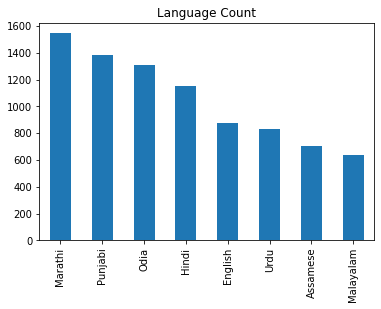

In [3]:
df['label'].value_counts().plot(kind='bar')
plt.title('Language Count')
plt.show()

In [4]:
lang_dict = {'Marathi':0, 'Punjabi':1, 'Odia':2, 'Hindi':3, 'English':4, 'Urdu':5, 'Assamese':6, 'Malayalam':7}

df['label'] = df['label'].map(lang_dict)

In [5]:
X = df.drop(['filename', 'label'], axis=1)
y = df['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=21)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training

In [8]:
model = models.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.BatchNormalization())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=32)

Epoch 1/32
211/211 [==============================] - 5s 12ms/step - loss: 1.4171 - accuracy: 0.5230 - val_loss: 1.2331 - val_accuracy: 0.6345
Epoch 2/32
211/211 [==============================] - 2s 9ms/step - loss: 0.9262 - accuracy: 0.6883 - val_loss: 0.8192 - val_accuracy: 0.7293
Epoch 3/32
211/211 [==============================] - 2s 10ms/step - loss: 0.7447 - accuracy: 0.7536 - val_loss: 0.7376 - val_accuracy: 0.7518
Epoch 4/32
211/211 [==============================] - 3s 12ms/step - loss: 0.6326 - accuracy: 0.7896 - val_loss: 0.6207 - val_accuracy: 0.7974
Epoch 5/32
211/211 [==============================] - 2s 9ms/step - loss: 0.5394 - accuracy: 0.8201 - val_loss: 0.6284 - val_accuracy: 0.7820
Epoch 6/32
211/211 [==============================] - 3s 13ms/step - loss: 0.4882 - accuracy: 0.8373 - val_loss: 0.5791 - val_accuracy: 0.8021
Epoch 7/32
211/211 [==============================] - 2s 9ms/step - loss: 0.4262 - accuracy: 0.8563 - val_loss: 0.5830 - val_accuracy: 0.7980
Ep

# Prediction & Evaluation

In [31]:
model.evaluate(X_test_scaled, y_test)

53/53 [==============================] - 0s 4ms/step - loss: 0.5553 - accuracy: 0.8578


[0.5552968382835388, 0.8578199148178101]

In [13]:
test_pred = np.argmax(model.predict(X_test_scaled), axis=1)
test_pred

array([0, 0, 0, ..., 2, 0, 4], dtype=int64)

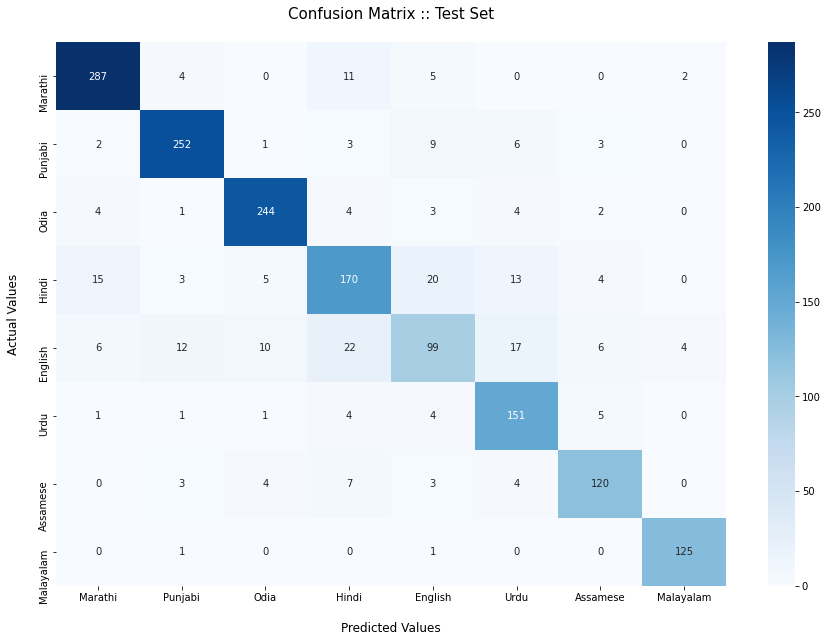

In [28]:
plt.figure(figsize=(15,10))
cf_matrix = confusion_matrix(y_test, test_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.set_xlabel('\nPredicted Values', fontsize=12)
ax.set_ylabel('Actual Values\n', fontsize=12)
ax.set_title('Confusion Matrix :: Test Set\n', fontsize=15)
ax.xaxis.set_ticklabels(list(lang_dict.keys()))
ax.yaxis.set_ticklabels(list(lang_dict.keys()))
plt.show()

In [32]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       309
           1       0.91      0.91      0.91       276
           2       0.92      0.93      0.93       262
           3       0.77      0.74      0.75       230
           4       0.69      0.56      0.62       176
           5       0.77      0.90      0.83       167
           6       0.86      0.85      0.85       141
           7       0.95      0.98      0.97       127

    accuracy                           0.86      1688
   macro avg       0.85      0.85      0.85      1688
weighted avg       0.85      0.86      0.86      1688



In [43]:
#!pip install h5py

In [36]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [39]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [42]:
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

loaded_model.evaluate(X_test_scaled, y_test, verbose=0)

[0.5552968382835388, 0.8578199148178101]